In [60]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

data = pd.read_csv('data.csv')
data.sample()

,DIST_NAME,Children under age 5 years who are stunted (%) Raw,Children under age 5 years who are stunted (%) N. Value,Pregnant women aged 15-49 years who are anaemic (Hb<11.0 g/dl) (%) Raw Data,Pregnant women aged 15-49 years who are anaemic (Hb<11.0 g/dl) (%) N. Value,Percentage of children aged 6-59 months who are anaemic (Hb<11.0 g/dl) Raw Data,Percentage of children aged 6-59 months who are anaemic (Hb<11.0 g/dl) N. Value,Children under five years who are underweight (Weight for age)(%) Raw Data,Children under five years who are underweight (Weight for age)(%) N. Value,"Average Yield (in Kg/Hect.) Rice, Wheat & Coarse Cereals Raw Data","Average Yield (in Kg/Hect.) Rice, Wheat & Coarse Cereals N. Value",Gross Value Added in Agriculture per worker (in lakh) Raw Data,Gross Value Added in Agriculture per worker (in lakh) N. Value,Goal 2 Score,Latitude,Longitude
25,Pali,44.4,19.11,61.6,23.71,53.4,44.19,41.3,24.77,1428,30.73,0.85,44.44,31.16,27.0238,74.2179


In [81]:
nb = 'shapefile\RAjasthan_admin_Dist_Boundary.shp'
regions = gpd.read_file(nb)
regions.sample(1)



In [82]:
merged = regions.set_index('DIST_NAME').join(data.set_index('DIST_NAME'))
merged = merged.reset_index()
merged = merged.fillna(0)
merged[["DIST_NAME","Goal 2 Score"]].all

<AxesSubplot:title={'center':'Heat Map of Goal 2 Score of Districts of Rajasthan'}>

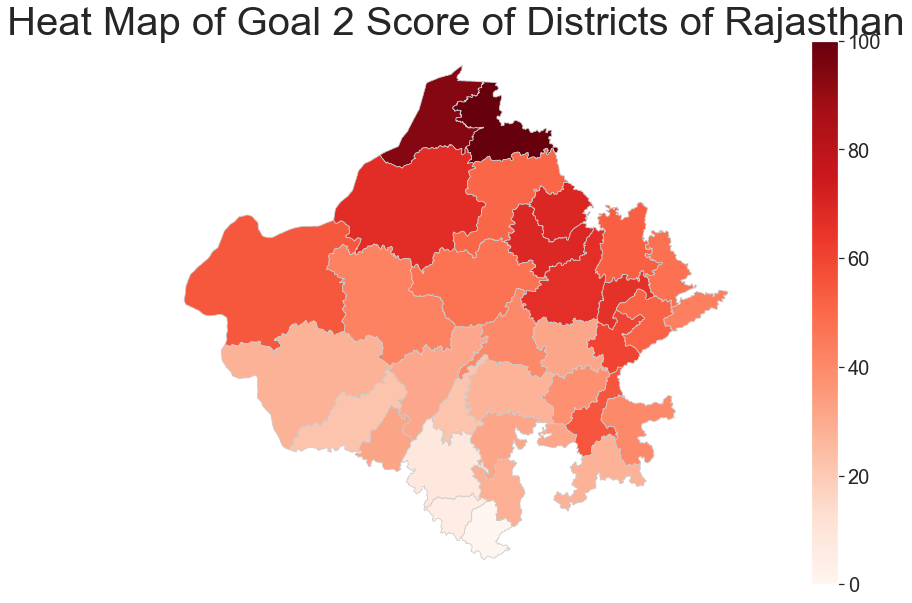

In [85]:
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Heat Map of Goal 2 Score of Districts of Rajasthan', fontdict={'fontsize': '40', 'fontweight' : '3'})
color = 'Reds'
vmin, vmax = 0, 100
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('Goal 2 Score', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(20,10))

In [86]:
for idx, row in merged.iterrows():
    plt.annotate(s=row['DIST_NAME'], xy=(row['Longitude'], row['Latitude']),
            horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()


c:\Users\Anuj\Desktop\heatmap\venv\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until
